# Results obtained using various solvers for the Vehicle Routing Problem
The `cost` acts as a parameter of comparison between different solvers. In this project it is the total sum of distances of the routes by each vehicle.
The approximation ratio is the ratio of the cost of the obtained from the solver to that of the best known solution. The closer it is to 1, the better the solver is.

By default the `LeapHybridCQMSampler` lets the solver run for around **5 seconds**. For better results this can be increased by passing a parameter `time_limit` into the solver's `.solve()` method. However, one needs to be careful about it as running it for too long may exhaust the limit of resources that D-Wave provides.

In [1]:
import numpy as np

class Initializer:

    def __init__(self, n, a, b):
        self.n = n
        self.a = a
        self.b = b

    def generate_nodes_weight_matrix_time_windows(self):

        n = self.n
        a = self.a
        b = self.b
        
        np.random.seed(100*a + b)

        x = (np.random.rand(n) - 0.5) * 20
        y = (np.random.rand(n) - 0.5) * 20

        weight_matrix = np.zeros([n, n])
        for i in range(n):
            for j in range(i+1, n):
                weight_matrix[i, j] = np.sqrt((x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2)
                weight_matrix[j, i] = weight_matrix[i, j]

        MAX_EARLIEST_TIME = 5 # The maximum possible "earliest arrival time" (i.e, lower bound for time window)
        MAX_TIME_WINDOW_RANGE = 30 # The largest possible time window size

        time_windows = [[0, 30]]
        for node in range(n):
            ti = 0 # round(np.random.rand() * MAX_EARLIEST_TIME)
            tf = 30 # round(np.random.rand() * MAX_TIME_WINDOW_RANGE + ti)
            time_windows.append([ti, tf])

        return x, y, weight_matrix, time_windows

In [2]:
# from utils import VRPSolver, compare_solvers, random_routing_instance

n=3     # number of clients
m=2     # number of vehicles

initializer = Initializer(n+1, n+1, 0)
xc, yc, cost, tw = initializer.generate_nodes_weight_matrix_time_windows()


FULL QUBO SOLVER (Constrained Quadratic Model)
52 feasible solutions of 53.
Minimum total cost: 52.61335165815282
Number of variables: 24
Runtime: 5019.393 ms


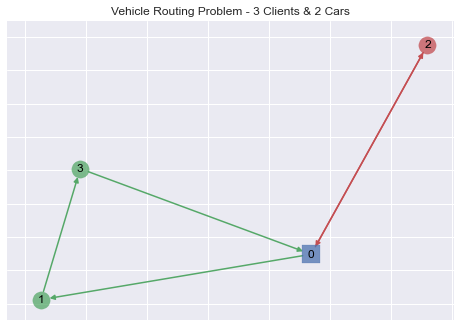

In [7]:
from VRP.quantum.CQM_based.fqstw_v2 import FQSTW

solver = FQSTW(n, m, cost, xc=xc, yc=yc, tw=tw)
sol = solver.solve(time_limit=5)
solver.visualize()

In [8]:
sampleset = sol['sampleset']
feasible = sampleset.filter(lambda row: row.is_feasible)
feasible.first

Sample(sample={'a.1': 17.0, 'a.2': 0.0, 'a.3': 0.0, 'a.4': 8.0, 'w.1': 5.0, 'w.2': 22.0, 'w.3': 0.0, 'w.4': 9.0, 'x.0.1': 0.0, 'x.0.2': 0.0, 'x.0.3': 1.0, 'x.0.4': 0.0, 'x.1.1': 1.0, 'x.1.2': 0.0, 'x.1.3': 0.0, 'x.1.4': 0.0, 'x.2.1': 0.0, 'x.2.2': 0.0, 'x.2.3': 0.0, 'x.2.4': 1.0, 'x.3.1': 0.0, 'x.3.2': 1.0, 'x.3.3': 0.0, 'x.3.4': 0.0}, energy=52.61335165815282, num_occurrences=1, is_feasible=True, is_satisfied=array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True]))